<a href="https://colab.research.google.com/github/theAkhileshRai/DeepLearning/blob/master/TensorflowRegressionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Regression NN

In [80]:
!pip install tensorflow==1.3

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
np.random.seed(42)
tf.set_random_seed(42)

In [83]:
rand_a = np.random.uniform(0,100,size=(5,5))
rand_a

array([[37.45401188, 95.07143064, 73.19939418, 59.86584842, 15.60186404],
       [15.59945203,  5.80836122, 86.61761458, 60.11150117, 70.80725778],
       [ 2.05844943, 96.99098522, 83.24426408, 21.23391107, 18.18249672],
       [18.34045099, 30.4242243 , 52.47564316, 43.19450186, 29.12291402],
       [61.18528947, 13.94938607, 29.21446485, 36.63618433, 45.60699842]])

In [84]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[78.51759614],
       [19.96737822],
       [51.42344384],
       [59.24145689],
       [ 4.64504127]])

In [0]:
a = tf.placeholder(tf.float32)
b= tf.placeholder(tf.float32)

In [0]:
add = a + b
mul = a * b


In [87]:
with tf.Session() as sess:
  add_result = sess.run(add,feed_dict={a:10,b:20})
  print(add_result)
  mul_result = sess.run(mul,feed_dict={a:10,b:20})
  print("\n"+ str(mul_result))

30.0

200.0


# Example Neural Network

In [0]:
n_features = 10
n_dense_neurons = 3
x= tf.placeholder(tf.float32,(None,n_features))

In [0]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b= tf.Variable(tf.ones([n_dense_neurons]))

In [0]:
xW = tf.matmul(x,W)


In [0]:
z= tf.add(xW,b)

In [0]:
act= tf.sigmoid(z)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:

  sess.run(init)
  layer_out = sess.run(act,feed_dict={x:np.random.random([1,n_features])})

In [95]:
layer_out

array([[0.6518201 , 0.09820659, 0.7350982 ]], dtype=float32)

# Simple Regression Example

In [0]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [97]:
x_data

array([-1.1338853 ,  1.09664184,  0.82538779,  4.56129454,  3.72078439,
        6.04312241,  6.10179989,  7.83798184,  9.02901973,  9.05456337])

In [0]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [99]:
y_label

array([1.40875388, 1.93650958, 3.54071905, 4.51781538, 4.73814438,
       6.82117826, 5.43214417, 6.86572637, 7.52457076, 9.47599099])

In [0]:
import matplotlib.pyplot as plt

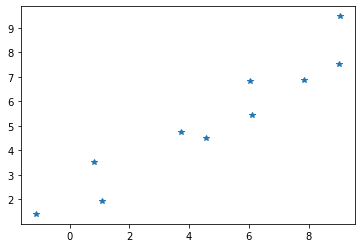

In [101]:
plt.plot(x_data,y_label,'*')
plt.show()

In [102]:
np.random.rand(2)

array([0.38867729, 0.27134903])

In [0]:
#y = mx+b
m= tf.Variable(0.82873751)
b = tf.Variable(0.35675333)

In [0]:
error = 0

for x,y in zip(x_data,y_data):
  y_hat = m*x + b

  error += (y-y_hat)**2

In [0]:
optim = tf.train.AdamOptimizer(learning_rate=0.001)
train = optim.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
with tf.Session() as sess:
  sess.run(init)
  training_steps = 10
  
  for i in range(training_steps):
    sess.run(train)
  final_slope, final_intercept = sess.run([m,b])

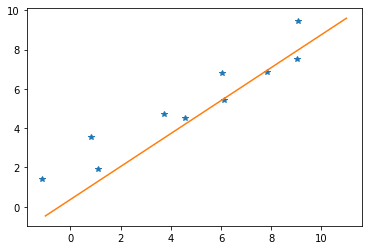

In [110]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_data,y_label,'*')
plt.plot(x_test,y_pred_plot)
plt.show()